用Python编写代码，将曲面绘制出来，以观察曲面的特点

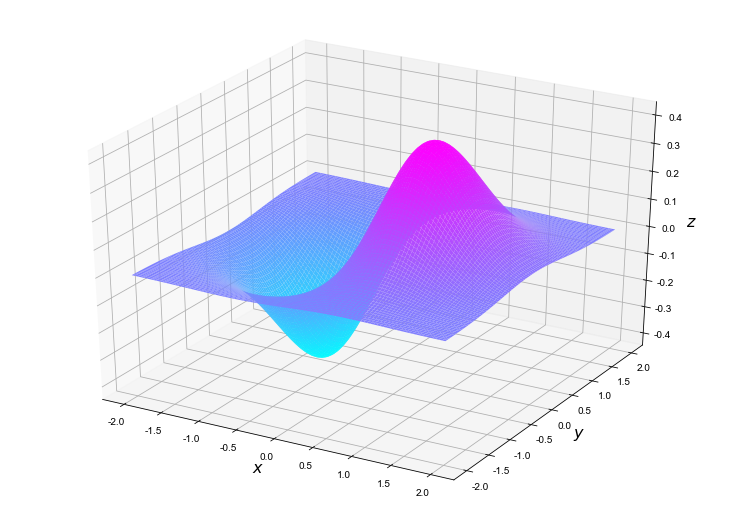

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.set_xlabel('$x$',fontsize=16)  
ax.set_ylabel('$y$',fontsize=16)    
ax.set_zlabel('$z$',fontsize=16)    
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
# x-y 平面的网格
x, y = np.meshgrid(x, y)
z = x*np.exp(-x**2-y**2)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.get_cmap('cool'))
plt.show()

由于函数z有x和y两个输入变量，因此针对的是二维空间。在给定定义域上随机生成20个粒子，设置粒子的最大速度为1。

In [2]:
# 初始化粒子群（包含20个粒子）
vmax = 1
# 设置惯性权重
w = 0.5
# 设置加速度常数
c1,c2 = 2,2
# 设置最大迭代次数
iters = 1000
# 设置最佳适应度值的增量阈值
alpha = 0.000001
# 在给定定义域内，随机生成位置矩阵如下
xMat = np.random.uniform(-2,2,(20,2))
# 在给定最大速度的限制下，随机生成速度矩阵如下
vMat = np.random.uniform(-vmax,vmax,(20,2))

对种群中所有粒子计算适应度

In [3]:
# 计算种群中所有粒子的适应度
def get_adjust(location):
    x,y = location
    return -x*np.exp(-x**2-y**2)

adjusts = np.array([get_adjust(loc) for loc in xMat])

循环更新pbest、gbest，同时更新所有粒子的位置与速度

In [4]:
pbest = xMat, adjusts
gbest = xMat[np.argmax(adjusts)], np.max(adjusts)
gbest_add = None
# 更新pbest、gbest，同时更新所有粒子的位置与速度
for k in range(iters):
    # 更新pbest，遍历adjusts，如果对应粒子的适应度是历史中最高的，则完成替换
    index = np.where(adjusts > pbest[1])[0]
    if len(index) > 0:
        pbest[0][index] = xMat[index]
        pbest[1][index] = adjusts[index]
    
    # 更新gbest
    if np.sum(pbest[1] > gbest[1]) > 0:
        gbest_add = np.max(adjusts) - gbest[1]
        gbest = xMat[np.argmax(adjusts)], np.max(adjusts)
    
    # 更新所有粒子的位置与速度
    xMat_backup = xMat.copy()
    xMat = xMat + vMat
    vMat = w*vMat + c1*np.random.uniform(0,1)*(pbest[0] - xMat_backup)+c2*np.random.uniform(0,1)*(gbest[0] - xMat_backup)
    
    # 如果vMat有值超过了边界值，则设定为边界值
    xMat[xMat > 2] = 2
    xMat[xMat < (-2)] = -2
    vMat[vMat > vmax] = vmax
    vMat[vMat < (-vmax)] = -vmax
    
    # 计算更新后种群中所有粒子的适应度
    adjusts = np.array([get_adjust(loc) for loc in xMat])
    
    # 检查全局适应度的增量，如果小于 alpha，则算法停止
    if gbest_add is not None and gbest_add < alpha:
        print("k = ",k," 算法收敛！")
        break
        
gbest
# (array([-0.70669195,  0.00303178]), -0.42887785271504353)

(array([-0.7170607 , -0.00304992]), 0.42879336905042126)